<a href="https://colab.research.google.com/github/tranhuuan170302/Analysis-market-in-job-information-technology/blob/main/handle_statistical_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import pandas as pd
import string 
import re
import time
import nltk
from nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

import matplotlib.pyplot as plt
import seaborn as sns

import math
sns.set()

# Overview data source

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/indeed/resultData.csv')

In [ ]:
# show top 5 data is head
df.head(10)

,Unnamed: 0,JobTitle,Company,Location,PostDate,ExtractDate,Summary,JobUrl
0,0,.Net Developer,SmartDev,Ðà Nẵng,Posted\nPosted 14 days ago,2023-01-25,Company Description\nSmartDev is a leading pro...,.NET Developer\n
1,1,Intern / Fresher Developer,DXC Technology,Thành phố Hồ Chí Minh,Employer\nActive 22 days ago,2023-01-25,Overview:\nHow would you like to join an inter...,.NET Developer\n
2,2,.NET Developer (Middle/Senior level),SIOUX,Ðà Nẵng,Posted\nPosted 30+ days ago,2023-01-25,Sioux Group was founded in 1996 in the Netherl...,.NET Developer\n
3,3,Jun/Mid/Senior .NET Developer,Saigon Technology,Ðà Nẵng,Posted\nPosted 18 days ago,2023-01-25,"Up to $2,200\nJunior, Middle, Senior\nDa Nang\...",.NET Developer\n
4,4,"Web Developer (.NET, ASP.NET, C#)",NPV Corp,Ðà Nẵng,Posted\nPosted 16 days ago,2023-01-25,"Web Developer (.NET, ASP.NET, C#)\nNPV Corp\nỨ...",.NET Developer\n
5,5,Fresher Software Developer (Low code platform)...,KMS Technology,Ðà Nẵng,Posted\nPosted 13 days ago,2023-01-25,Company Description\n\nKMS was established in ...,.NET Developer\n
6,6,Junior Dot Net Developer,HR2B,Thành phố Hồ Chí Minh,Posted\nPosted 30+ days ago,2023-01-25,LẬP TRÌNH VIÊN .NET\nNET DEVELOPER\nMÔ TẢ CÔNG...,.NET Developer\n
7,7,Software Engineer / Web Developer (.NET),Websparks,Việt Nam,Posted\nToday,2023-01-25,"You will play a vital role in our team, where ...",.NET Developer\n
8,8,Dot Net Developer,Direct Flights,Thành phố Hồ Chí Minh,Posted\nPosted 30+ days ago,2023-01-25,Remote Full Stack Senior .NET / .Net Core / De...,.NET Developer\n
9,9,.NET Support Developer,Sharesource,Việt Nam,Posted\nPosted 5 days ago,2023-01-25,Vietnam\n\nAre you ready to take your career t...,.NET Developer\n


In [ ]:
df.rename(columns={'JobName': 'JobUrl'}, inplace=True)

In [ ]:
df.sample(n=10)

,Unnamed: 0,JobTitle,Company,Location,PostDate,ExtractDate,Summary,JobUrl
2430,596,Manager - Tax Transfer Pricing - Hanoi Office,EY,Hà Nội,Posted\nPosted 12 days ago,2023-01-26,The opportunity in tax career with focus on tr...,Business Analyst\n
3636,164,Full-Stack Developer (Node.JS/React.JS),ONE Tech Stop Vietnam Company Ltd,Ðà Nẵng,Posted\nPosted 6 days ago,2023-01-26,Full-Stack Developer (Node.JS/React.JS)\nONE T...,Front End Web Developer\n
1617,78,Senior Backend Developer (Python/Go),OPSWAT,Thành phố Hồ Chí Minh,Posted\nPosted 13 days ago,2023-01-25,OPSWAT is a global cyber security company prov...,Back End Web Developer\n
1786,19,Electrical Engineer,Công ty TNHH Van Der Leun Việt Nam,Việt Nam,Posted\nPosted 30+ days ago,2023-01-25,"Sex:Male, below 36 years old.\nEducationalleve...",Bridge Engineer\n
3251,315,"Front-end Java Developer (JavaScript, Html, CSS)",Scandinavian Software Park,Hà Nội,Posted\nPosted 7 days ago,2023-01-26,"Front-end Java Developer (JavaScript, Html, CS...",Front End Developer\n
2969,33,Senior Front-end Developer,Binance,Thành phố Hồ Chí Minh,Posted\nPosted 13 days ago,2023-01-26,Binance is the global blockchain company behin...,Front End Developer\n
462,462,SharePoint Developers,Axon Active Vietnam,Thành phố Hồ Chí Minh,Posted\nPosted 30+ days ago,2023-01-25,"Description\nComing to Axon Active, you will w...",.NET Developer\n
3384,448,Tuyển dụng development IT,WORLDCRAFT LOGISTICS LLC,Nha Trang,Posted\nPosted 22 days ago,2023-01-26,--- Công ty WorldCraft Logistic cần tuyển nhân...,Front End Developer\n
2935,153,Senior/Regular Embedded C++ Developer,Luxoft,Thành phố Hồ Chí Minh,Posted\nPosted 30+ days ago,2023-01-26,Project Description\nBe part of a multinationa...,Embedded Engineer\n
1243,71,NodeJS Developer (ReactJS),CÔNG TY TNHH DROH,Thành phố Hồ Chí Minh,Posted\nPosted 10 days ago,2023-01-25,NodeJS Developer (ReactJS)\nCÔNG TY TNHH DROH\...,Back End Developer\n


In [ ]:
df.iloc[[5,100, 456, 500, 556 ,668,1680,2564, 2755, 2897, 3759, 4256, 4311], :]

,Unnamed: 0,JobTitle,Company,Location,PostDate,ExtractDate,Summary,JobUrl
5,5,Fresher Software Developer (Low code platform)...,KMS Technology,Ðà Nẵng,Posted\nPosted 13 days ago,2023-01-25,Company Description\n\nKMS was established in ...,.NET Developer\n
100,100,Senior .NET Engineer,NashTech,Ðà Nẵng,Posted\nPosted 30+ days ago,2023-01-25,Description\nThe Senior Software Engineer (SSE...,.NET Developer\n
456,456,Tuyển dụng development IT,WORLDCRAFT LOGISTICS LLC,Nha Trang,Posted\nPosted 21 days ago,2023-01-25,--- Công ty WorldCraft Logistic cần tuyển nhân...,.NET Developer\n
500,500,"Automation Tester (Web, Desktop App)",Công Ty TNHH Simpson Strong-Tie Việt Nam,Thành phố Hồ Chí Minh,Posted\nPosted 14 days ago,2023-01-25,Mô tả công việc:\n(Mức lương: Thỏa thuận)\nAs ...,.NET Developer\n
556,556,Technical Architect (.NET/Java Tech Lead),AIA Vietnam,Thành phố Hồ Chí Minh,Posted\nPosted 20 days ago,2023-01-25,Technical Architect (.NET/Java Tech Lead)\nAIA...,.NET Developer\n
668,24,Android Developer,Dazone Tech,Thành phố Hồ Chí Minh,Posted\nPosted 30+ days ago,2023-01-25,Android Developer\nDazone Tech\nỨng Tuyển\nAnd...,Android App Developer\n
1680,141,Fresher PHP Developer,Phần mềm Vitex Việt Nam,Hà Nội,Posted\nPosted 30+ days ago,2023-01-25,Giới thiệu:\nVitex - Vietnam IT Excellence Net...,Back End Web Developer\n
2564,730,HCMC - .NET Developer (Junior/Middle/Senior),Amaris Consulting,Thành phố Hồ Chí Minh,Posted\nPosted 6 days ago,2023-01-26,Who are we?\nAmaris Consulting is an independe...,Business Analyst\n
2755,180,BRSE,Việc Ơi It Client,Ðà Nẵng,Posted\nPosted 30+ days ago,2023-01-26,Giới thiệu:\nViệc Ơi It Client\n\nlà công ty 1...,C++ Developer\n
2897,115,Analog Design Engineer,Adecco,Hà Nội,Posted\nPosted 30+ days ago,2023-01-26,Job summary\nAnalog Design Engineer\nJob Respo...,Embedded Engineer\n


In [ ]:
# drop column 'Unnamed'
df.drop(columns='Unnamed: 0', inplace = True)

In [ ]:
# show infomaion data
def overView(x):
    listSummary = []
    for i in x.columns:
        row = x[i].shape[0]
        missingVal = x[i].isna().sum()
        unique = len(x[i].unique())
        typeCol = str(x[i].dtype)
        percentageMissingVal = x[i].isna().sum()/x.shape[0]*100
        listSummary.append([i, row,typeCol,unique, missingVal, percentageMissingVal])
    return pd.DataFrame(listSummary, columns = ['Name Columns', 'Total row', 'type col', 'Total unique', 'Total miss val', 'percentage missing value'])

In [ ]:
# show information databases
overView(df)

,Name Columns,Total row,type col,Total unique,Total miss val,percentage missing value
0,JobTitle,4379,object,2220,0,0.0
1,Company,4379,object,1114,0,0.0
2,Location,4379,object,39,0,0.0
3,PostDate,4379,object,43,0,0.0
4,ExtractDate,4379,object,2,0,0.0
5,Summary,4379,object,2678,0,0.0
6,JobUrl,4379,object,13,0,0.0


# Process data step-by-step <br>
+ Step 1: Remove special character.<br>
+ Step 2: Using algorithm TF-IDF to look up keyword important in sentence.<br>
+ Step 3: Create list keywords include: keyword skill, keyword tool, keyword degree, keyword level. <br>
+ Step 4: Filter keywords in sentence by look at list keyword to choose.<br>
+ Step 5: Create dataFrame add keyword.<br>
+ Step 6: Visualization data, and hypothesis testing.<br>

In [ ]:
# download package
nltk.download('stopwords')
nltk.download('punkt')
# required for parts of speech tagging
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## Keyword skills, tools, degree, level.

In [ ]:
# got these keywords by looking at some examples and using existing knowledge.
tool_keywords = ['.net', 'java', 'azur', 'javascript', 'css3', 'azure', 'amazon', 'python', 'c', 'c++', 'c#', 'linux', 'angularjs', 'regularjs', 'requirejs', 'numpy', 'nuxtjs', 'xlsx',
			'microsoft', 'bootstrap', 'js', 'visual', 'typescript', 'snack', 'abi', 'nodejs', 'html5', 'reactjs', 'redhat', 'reactcharts', 'mongoldb', 'xmlhttprequest',
			'vscode', 'vuejs','melonjs', 'xampp', 'winform', 'wireless', 'wireshark', 'wordpress', 'virtualbox', 'google cloud', 'scala', 'django', 'hadoop', 'haoop', 'zookeep' , 'solr',
			'photoshop', 'php', 'phd', 'relayjs', 'oracle', 'opencv', 'p2p', 'redux', 'referenced', 'pytest', 'matplotlib', 'lavarel', 'nestjs', 'unix', 'git', 'redi',
			'pyspark', 'pytorch', 'protocol', 'sql', 'websocket', 'proptech', 'progresql', 'plsql', 'powerbi', 'powerdesigner', 'lambda', 'nuget', 'untiy3d', 'flutter',
			'tableau', 'scratch', 'scrum', 'scipy', 'scikit', 'simulated', 'screenshot', 'script', 'powerpoint', 'serves', 'excel', 'word', 'waveform', 'docker', 'mariadb', 'markdowns', 'matlab', 'melonjs', 'ngnix', 'ubuntu', 'toolkits']




# hard skills/knowledge required.
skill_keywords = ['refresh', 'probabilities', 'leader', 'portability', 'warehouse', 'maitainance', 'metadata', 'maximization', 'knowledgeable', 'modify', 'navigate',
 'manager', 'metastock', 'metaverse', 'psychology','pipline', 'programing', 'provides', 'prblem solving','predict', 'statistics',
'cleansing', 'chatbot', 'cleaning', 'blockchain', 'causality', 'correlation', 'bandit', 'anomaly', 'test case', 'tsql', 'databases', 'sql',
 'dashboard', 'geospatial', 'ocr', 'english', 'math', 'econometrics', 'marketing', 'tuning', 'hyperparameter', 'hypothesis',
 'salesforcecom', 'segmentation', 'biostatistics', 'unsupervised', 'supervised', 'exploratory', 'logic', 'multithread',
 'recommender', 'recommendations', 'research', 'sequencing', 'probability', 'reinforcement', 'graph', 'bioinformatics', 
 'knn', 'outlier', 'etl', 'normalization', 'classification', 'optimizing', 'csdl', 'report', 'databases', 'sql', 'test',
 'clustering', 'cluster', 'design', 'optimization', 'visualization', 'nlp', 'negotiation', 'network', 'glm', 'uiux', 'teamwork', 'creative thinking',
  'gbm', 'boosting', 'recurrent', 'convolutional', 'bayesian', 'mindset', 'threadhandling', 'analytic', 'e-commerc',
  'support', 'teamwork', 'communicated', 'adaptability', 'coding', 'virtualization', 'organization', 'creativity']



degree = ['bs', 'bachelor', 'undergraduate', 'certificate',
               'master', 'graduate', 'mba', 'intermediate',
               'phd', 'ph.d', 'ba', 'ma', 'it',
               'postdoctoral', 'postdoc', 'doctorate']

level = ['junior', 'intership', 'fresher', 'senior', 'middle', 'leader', 'architect', 'manager']

In [ ]:
# parts of speech tagging
tagged = nltk.pos_tag(tool_keywords)

In [ ]:
print(tagged)

[('.net', 'NN'), ('java', 'NN'), ('azur', 'NN'), ('javascript', 'NN'), ('css3', 'NN'), ('azure', 'NN'), ('amazon', 'NN'), ('python', 'NN'), ('c', 'NN'), ('c++', 'NN'), ('c#', 'NN'), ('linux', 'NN'), ('angularjs', 'NN'), ('regularjs', 'NN'), ('requirejs', 'NN'), ('numpy', 'JJ'), ('nuxtjs', 'JJ'), ('xlsx', 'NN'), ('microsoft', 'JJ'), ('bootstrap', 'NN'), ('js', 'NN'), ('visual', 'JJ'), ('typescript', 'NN'), ('snack', 'NN'), ('abi', 'NN'), ('nodejs', 'JJ'), ('html5', 'NN'), ('reactjs', 'NN'), ('redhat', 'WP'), ('reactcharts', 'VBZ'), ('mongoldb', 'NN'), ('xmlhttprequest', 'JJS'), ('vscode', 'NN'), ('vuejs', 'NN'), ('melonjs', 'NN'), ('xampp', 'NNP'), ('winform', 'NN'), ('wireless', 'NN'), ('wireshark', 'NN'), ('wordpress', 'NN'), ('virtualbox', 'NN'), ('google cloud', 'NN'), ('scala', 'NN'), ('django', 'NN'), ('hadoop', 'NN'), ('haoop', 'NN'), ('zookeep', 'NN'), ('solr', 'NN'), ('photoshop', 'NN'), ('php', 'NN'), ('phd', 'NN'), ('relayjs', 'NN'), ('oracle', 'NN'), ('opencv', 'IN'), ('p2p'

## Step 1: Remove special character.

In [ ]:
# create key in row
df = df.reset_index()

In [ ]:
# column Summary
df['Summary'] = df['Summary'].apply(lambda x : re.sub(r'(<[^>]+>)|(http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*,]|(?:%[0-9a-fA-F][0-9a-fA-F]))+)',' ', x))
df['Summary'] = df['Summary'].str.replace('\n', ' ')

# column JobUrl
df['JobUrl'] = df['JobUrl'].str.replace('\n', '')
# column locations
df['Location'] = df['Location'].apply(lambda string: string.replace(string[string.find('+'): len(string)], '') if string.find('+') >0 else string, '')
df['Location'] = df['Location'].str.lower()
df['Location'] = df['Location'].str.replace('\n', '')
df['Location'] = df['Location'].str.replace('ð', 'đ')

In [ ]:
df['review'] = df['Summary']
df1 = pd.DataFrame(columns = ['index', 'review'])
# split the text by "."
for idx in df.index.unique():
  string = df['Summary'][idx]
  string = string.split('.')
  id = []
  txt = []
  
  for st in string:
    id.append(idx)
    txt.append(st)
    datax = pd.DataFrame(list(zip(id, txt)), columns = ['index', 'review'])
  df1 = pd.concat([df1, datax])

In [ ]:
df1.rename(columns= {'review': 'sentence_review'}, inplace=True)

In [ ]:
# merger data by index
df = df.merge(df1, left_on = 'index', right_on = 'index')

In [ ]:
# remove data is duplicated
df = df.loc[df.duplicated() == False, :]

## Filter keywords in sentences

In [ ]:
keywords = tool_keywords + skill_keywords + degree + level

In [ ]:
keywords[:10]

['.net',
 'java',
 'azur',
 'javascript',
 'css3',
 'azure',
 'amazon',
 'python',
 'c',
 'c++']

In [ ]:

ps = PorterStemmer()
keywords_set = set([ps.stem(tok) for tok in keywords])

#find sentences with words in tool_keyword list
def filterString(string):
  item = string.split(' ')
  stemmed_tokens = [ps.stem(tok).lower() for tok in item]
  for st in stemmed_tokens:
    if keywords_set.__contains__(st):
      return string
  return None

In [ ]:
df['review_filter'] = df['sentence_review'].apply(lambda string: filterString(string))

In [ ]:
df['review_filter'].isna().sum()

46559

In [ ]:
df = df.loc[df['review_filter'].isna() == False, :]

In [ ]:
ps = PorterStemmer()

arr = ['JJ', 'NN', 'RB', 'VBD', 'PRP', 'VBG', 'NNS', 'JJS', 'VBP', 'JJR', 'VBZJJ', 'IN', 'NNP', 'WP', 'VBZ']
# process the job description.
def prepare_job_desc(desc):
    # tokenize description.
    tokens = word_tokenize(desc)
        
    # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)
    
    # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = [tok for tok, tag in token_tag if tag in include_tags]
    
    # stem words.
    stemmed_tokens = [ps.stem(tok).lower() for tok in filtered_tokens]
    return set(stemmed_tokens)

df['job_description_word_set'] = df['review_filter'].map(prepare_job_desc)

In [ ]:
tool_keywords_set = set([ps.stem(tok) for tok in tool_keywords])
skill_keywords_set = set([ps.stem(tok) for tok in skill_keywords])
degree_set = set([ps.stem(tok) for tok in degree])
level_set = set([ps.stem(tok) for tok in level])

In [ ]:
degree_dict = {ps.stem(tok): tok for tok in degree}
skill_keywords_dict = {ps.stem(tok): tok for tok in skill_keywords}
tool_keywords_dict = {ps.stem(tok): tok for tok in tool_keywords}
level_dict = {ps.stem(tok): tok for tok in level}

In [ ]:
# look at keyword of tool in job_description_word_set
def tool_word(string):
  tool_words = ''
  words = tool_keywords_set.intersection(string)
  if len(words) == 0:
    tool_words = None
  else:
    for word in words:
      tool_words += word
      tool_words += ', '
  return tool_words

df['tool_words'] = df['job_description_word_set'].map(tool_word)
df['tool_words'] = df['tool_words'].apply(lambda string: re.sub(', $', '', string) if string != None else string, '')

In [ ]:
# look at keyword of skill in job_description_word_set
def skill_word(string):
  tool_words = ''
  words = skill_keywords_set.intersection(string)
  if len(words) == 0:
    tool_words = None
  else:
    for word in words:
      tool_words += word
      tool_words += ', '
  return tool_words

df['skill_words'] = df['job_description_word_set'].map(skill_word)
df['skill_words'] = df['skill_words'].apply(lambda string: re.sub(', $', '', string) if string != None else string, '')

In [ ]:

# look at keyword of degree in job_description_word_set
def degree_word(string):
    
    tool_words = ''
    words = degree_set.intersection(string)
    
    if len(words) == 0:
      tool_words = None
    else:
      for word in words:
        tool_words += word
        tool_words += ', '
    return tool_words
  
df['degree'] = df['job_description_word_set'].map(degree_word)
df['degree'] = df['degree'].apply(lambda string: re.sub(', $', '', string) if string != None else string, '')

In [ ]:

# look at keyword of level in job_description_word_set
def level_word(string):
    
    tool_words = ''
    words = level_set.intersection(string)
    
    if len(words) == 0:
      tool_words = None
    else:
      for word in words:
        tool_words += word
        tool_words += ', '
    return tool_words
  
df['level'] = df['job_description_word_set'].map(level_word)
df['level'] = df['level'].apply(lambda string: re.sub(', $', '', string) if string != None else string, '')

In [ ]:
df['Summary'] = df.Summary.apply(lambda x: word_tokenize(x))
df['Summary'] = df.Summary.apply(lambda x: [ps.stem(word) for word in x])
df['Summary'] = df.Summary.apply(lambda x: ' '.join(x))

df['Summary'] = df['Summary'].str.replace('năm', 'year')

df['YearExperience'] = df['Summary'].apply(lambda x : re.findall(r'([0-9]+) year',x))
df['YearExperience'] = df['YearExperience'].apply(lambda y : [0] if len(y)==0 else y)

In [ ]:
df.head()

,index,JobTitle,Company,Location,PostDate,ExtractDate,Summary,JobUrl,review,sentence_review,review_filter,job_description_word_set,tool_words,skill_words,degree,level,YearExperience
0,0,.Net Developer,SmartDev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,compani descript smartdev is a lead provid of ...,.NET Developer,Company Description SmartDev is a leading prov...,Company Description SmartDev is a leading prov...,Company Description SmartDev is a leading prov...,"{global, smartdev, solut, descript, compani, p...",None,provid,None,None,[0]
2,0,.Net Developer,SmartDev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,compani descript smartdev is a lead provid of ...,.NET Developer,Company Description SmartDev is a leading prov...,SmartDev combines renowned Swiss quality with...,SmartDev combines renowned Swiss quality with...,"{qualiti, swiss, excel, valu, smartdev, combin...",excel,None,None,None,[0]
6,0,.Net Developer,SmartDev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,compani descript smartdev is a lead provid of ...,.NET Developer,Company Description SmartDev is a leading prov...,Job Description You will report to PM (Proj...,Job Description You will report to PM (Proj...,"{softwar, architectur, clean, product, design,...",None,"clean, code, design, manag",None,manag,[0]
7,0,.Net Developer,SmartDev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,compani descript smartdev is a lead provid of ...,.NET Developer,Company Description SmartDev is a leading prov...,Net programming languages Test and deploy appl...,Net programming languages Test and deploy appl...,"{document, qualif, work, life, code, experi, p...",None,"code, test, program",None,None,[0]
9,0,.Net Developer,SmartDev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,compani descript smartdev is a lead provid of ...,.NET Developer,Company Description SmartDev is a leading prov...,"NET framework, SQL Server and design/ architec...","NET framework, SQL Server and design/ architec...","{knowledg, architectur, design/, framework, ne...",sql,"knowledg, sql",None,None,[0]


In [ ]:
def convertInt(array):
    result = []
    for arr in array:
        result.append(int(arr))
    return min(result)

In [ ]:
df['YearExperience'] = df['YearExperience'].apply(lambda arr: convertInt(arr)) 

In [ ]:
# choose columns importaint
df[['index', 'JobTitle', 'Company', 'Location', 'tool_words', 'skill_words', 'Summary', 'degree', 'level', 'YearExperience', 'JobUrl']]

,index,JobTitle,Company,Location,tool_words,skill_words,Summary,degree,level,YearExperience,JobUrl
0,0,.Net Developer,SmartDev,đà nẵng,None,provid,compani descript smartdev is a lead provid of ...,None,None,0,.NET Developer
2,0,.Net Developer,SmartDev,đà nẵng,excel,None,compani descript smartdev is a lead provid of ...,None,None,0,.NET Developer
6,0,.Net Developer,SmartDev,đà nẵng,None,"clean, code, design, manag",compani descript smartdev is a lead provid of ...,None,manag,0,.NET Developer
7,0,.Net Developer,SmartDev,đà nẵng,None,"code, test, program",compani descript smartdev is a lead provid of ...,None,None,0,.NET Developer
9,0,.Net Developer,SmartDev,đà nẵng,sql,"knowledg, sql",compani descript smartdev is a lead provid of ...,None,None,0,.NET Developer
...,...,...,...,...,...,...,...,...,...,...,...
84541,4377,"Lập Trình Viên Fullstack (PHP, MYSQL, React) S...",JobsGO Recruit,thành phố hồ chí minh,git,None,mô tả công việc : ( mức lương : thỏa thuận ) d...,None,None,3,Full Stack Web Developer
84542,4377,"Lập Trình Viên Fullstack (PHP, MYSQL, React) S...",JobsGO Recruit,thành phố hồ chí minh,None,"english, commun",mô tả công việc : ( mức lương : thỏa thuận ) d...,None,None,3,Full Stack Web Developer
84550,4378,"Senior Fullstack Engineer (Java, React)",Zühlke,thành phố hồ chí minh,"scrum, docker, java, azur",test,perman full-tim ho chi minh citi softwar engin...,certif,senior,5,Full Stack Web Developer
84552,4378,"Senior Fullstack Engineer (Java, React)",Zühlke,thành phố hồ chí minh,scrum,"english, commun, mindset",perman full-tim ho chi minh citi softwar engin...,"master, bachelor",None,5,Full Stack Web Developer


In [ ]:
df.loc[df['level'].isna() == True, :].index

Int64Index([    0,     2,     7,     9,    10,    11,    13,    16,    18,
               19,
            ...
            84525, 84528, 84529, 84535, 84539, 84540, 84541, 84542, 84552,
            84554],
           dtype='int64', length=28458)

In [ ]:
for i in df.loc[df['degree'].isna() == True, :].index:
  string = df['Summary'][i].lower()
  if string.find('đại học') > 0:
    df['degree'][i] = 'undergraduate'

<ipython-input-39-2676db7758f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['degree'][i] = 'undergraduate'


In [ ]:
job = df[['index', 'JobTitle', 'Company', 'Location','Summary', 'JobUrl']].loc[df[['index', 'JobTitle', 'Company', 'Location','Summary', 'JobUrl']].duplicated() == False, :]

In [ ]:
job.shape

(4318, 6)

# Create dataFrame by class

In [ ]:
job_tool = df[['index', 'tool_words']].loc[df[['index', 'tool_words']].duplicated() == False, :]
job_skill = df[['index', 'skill_words']].loc[df[['skill_words']].duplicated() == False, :]
job_level = df[['index', 'level']].loc[df[['index', 'level']].duplicated() == False, :]
job_degree = df[['index', 'degree']].loc[df[['index', 'degree']].duplicated() == False, :]
job_YearExperience = df[['index', 'YearExperience']].loc[df[['index', 'YearExperience']].duplicated() == False, :]

In [ ]:
skill = pd.DataFrame(job_tool.set_index('index').tool_words.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)).reset_index()
job_tool = skill.loc[skill.duplicated()==False, :]

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [ ]:
skill = pd.DataFrame(job_skill.set_index('index').skill_words.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)).reset_index()
job_skill = skill.loc[skill.duplicated()==False, :]

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [ ]:
skill = pd.DataFrame(job_level.set_index('index').level.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)).reset_index()
job_level = skill.loc[skill.duplicated()==False, :]

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [ ]:
job_YearExperience = job_YearExperience.loc[job_YearExperience.duplicated()==False, :]

In [ ]:
skill = pd.DataFrame(job_degree.set_index('index').degree.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)).reset_index()
job_degree = skill.loc[skill.duplicated()==False, :]

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [ ]:
job['Location'].unique()

array(['đà nẵng', 'thành phố hồ chí minh', 'việt nam', 'hà nội',
       'thủ dầu một', 'remote', 'bình dương', 'bắc ninh', 'đồng nai',
       'nha trang', 'quận 7', 'hòa bình', 'gò vấp', 'đắk lắk', 'long an',
       'thừa thiên - huế', 'long thành', 'cần thơ', 'an giang', 'thủ đức',
       'huế', 'hạ long', 'hưng yên', 'bình định', 'đà lạt', 'quảng ngãi',
       'hải phòng', 'hải dương', 'thuận an', 'khánh hòa'], dtype=object)

In [ ]:
job_tool.rename(columns= {0: 'Name Tool'}, inplace = True)
# show 5 top head records of tool
job_tool.head()

,index,Name Tool
0,0,excel
1,0,sql
2,0,c
3,0,visual
4,0,nodej


In [ ]:
job_skill.rename(columns= {0: 'Name Skill'}, inplace = True)
# show 5 top head records of skills
job_skill.head()

,index,Name Skill
0,0,provid
1,0,clean
2,0,code
3,0,design
4,0,manag


In [ ]:
job_level.rename(columns={0: 'name level'}, inplace = True)
# show 5 top head records of level
job_level.head()

,index,name level
0,0,manag
1,3,middl
2,3,junior
3,3,senior
4,5,fresher


In [ ]:
job_degree.rename(columns={0: 'name degree'}, inplace = True)
# show 5 top head records of degree
job_degree.head()

<ipython-input-52-42f9097f0745>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_degree.rename(columns={0: 'name degree'}, inplace = True)


,index,name degree
0,1,graduat
1,2,bachelor
2,3,master
3,3,certif
4,4,undergraduate


In [ ]:
job_YearExperience.rename(columns={0: 'name YearExperience'}, inplace = True)
# show 5 top head records of degree
job_YearExperience.head()

,index,YearExperience
0,0,0
13,1,0
27,2,4
56,3,2
75,4,1


# Remove data outline

In [ ]:
print(job_YearExperience.columns)
print(job_YearExperience.shape)

Index(['index', 'YearExperience'], dtype='object')
(4318, 2)


<Axes: xlabel='YearExperience'>

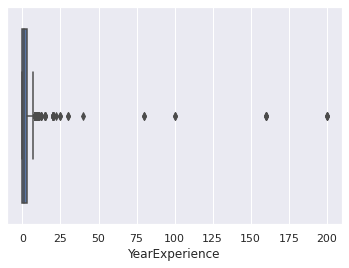

In [ ]:
sns.boxplot(x=job_YearExperience['YearExperience'])

In [ ]:
job_YearExperience = job_YearExperience.loc[job_YearExperience['YearExperience'] < 10, :]

In [ ]:
def visualze(column, data):
  plt.figure(figsize = (20,10))

  plt.subplot(1, 2, 1)
  string_density = 'vẽ biểu đồ density phân phố của ' + column
  plt.title(string_density)
  sns.kdeplot(data[column] , bw = 0.5 , fill = True)
  plt.subplot(1, 2, 2)
  string_box = 'vẽ biểu đồ boxplot của '+ column
  plt.title(string_box)
  sns.boxplot(x=data[column])
  plt.show()

<ipython-input-57-b1a4949581d6>:7: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(data[column] , bw = 0.5 , fill = True)


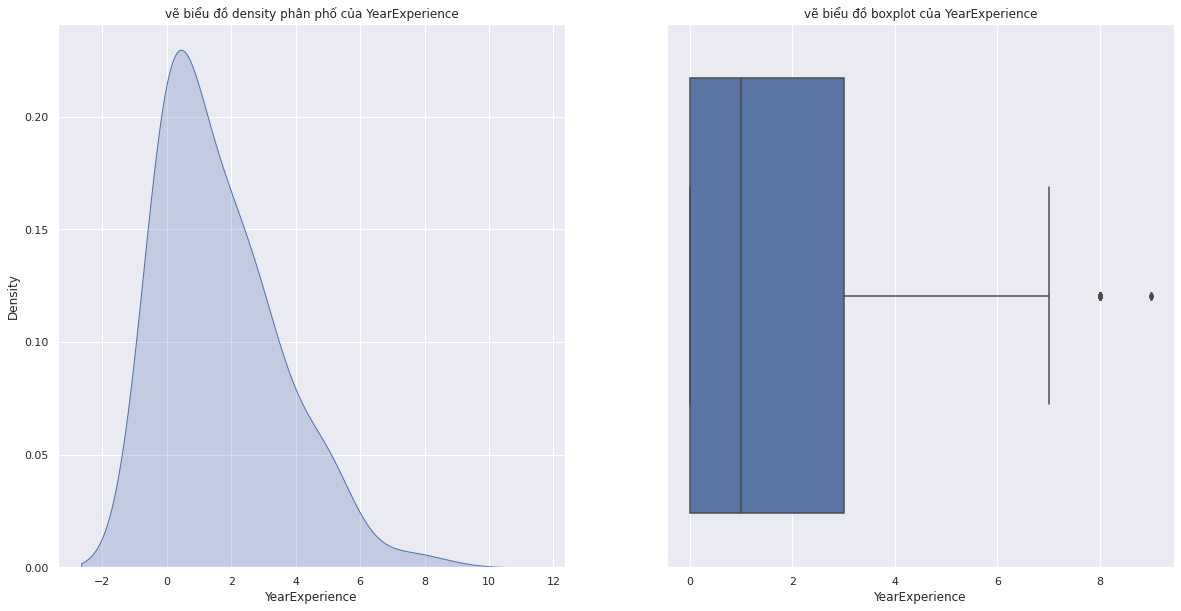

In [ ]:
visualze('YearExperience', job_YearExperience)

In [ ]:
# Filter values is trend in data job_skill
name_skill = ['metadata', 'sequenc', 'csdl', 'multithr', 'correl', 'refresh', 'tsql',
              'maxim', 'explorat', 'cleans', 'metavers', 'probabl', 'chatbot', 'nlp',
              'classif', 'boost', 'portabl', 'hypothes', 'reinforc', 'uiux', 'maitain'
              ,'metastoc', 'psycholo', 'economet', 'threadha', 'ocr', 'bayesian']

In [ ]:
mark = job_skill['Name Skill'].isin(name_skill)

In [ ]:
job_skill.drop(job_skill[mark].index, inplace = True)

In [ ]:
name_tool = job_tool['Name Tool'].value_counts()[55:].index
mark_tool = job_tool['Name Tool'].isin(name_tool)
job_tool.drop(job_tool[mark_tool].index, inplace = True)

In [ ]:
# grammatical normalization of the word
job_skill['Name Skill'] = job_skill['Name Skill'].apply(lambda string: string.replace(string, skill_keywords_dict[string]) if string != None else string, '')
job_tool['Name Tool'] = job_tool['Name Tool'].apply(lambda string: string.replace(string, tool_keywords_dict[string]) if string != None else string, '')
job_level['name level'] = job_level['name level'].apply(lambda string: string.replace(string, level_dict[string]) if (string != None) else string, '')
job_degree['name degree'] = job_degree['name degree'].apply(lambda string: string.replace(string, degree_dict[string]) if ((string != None) & (string != 'undergraduate')) else string, '')

<ipython-input-63-6683a53d4de4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_degree['name degree'] = job_degree['name degree'].apply(lambda string: string.replace(string, degree_dict[string]) if ((string != None) & (string != 'undergraduate')) else string, '')


# Visualization databases

## Title job at Viet Nam

In [ ]:
name = job['JobUrl'].value_counts().index
values = job['JobUrl'].value_counts().values

In [ ]:
lis = []
for i in values:
  lis.append(i*100/values.sum())

In [ ]:
len(lis)

13

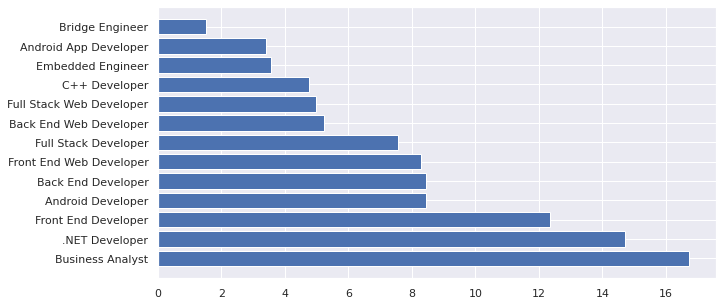

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.barh(name, lis)
plt.show()

ValueError: ignored

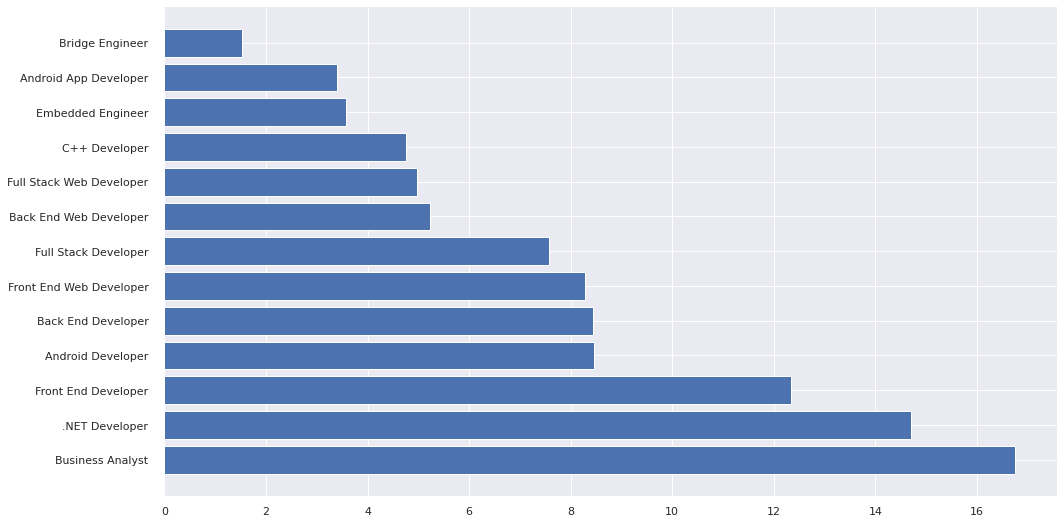

In [ ]:
from tkinter.constants import BOTTOM

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, lis)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Biểu đồ 1: Việc làm được phổ biến theo nhu cầu của các công ty \nở Viêt Nam tuyển dụng năm 2023',
             loc ='center' )
 
# Add Text watermark
fig.text(0.9, 0.15, 'tranhuuan', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
# Show Plot
plt.show()

# Top 10 tools in information technology.

In [ ]:
tool = ['excel', 'scrum', 'azure',
       'amazon', 'bootstrap', 'microsoft', 'git', 'winform', 'linux',
       'docker', 'oracle', 'simulated', 'wordpress', 'photoshop',
       'mariadb', 'tableau', 'websocket', 'django', 'ubuntu', 'scratch', 'word',
       'unix', 'powerpoint', 'hadoop', 'powerbi']

In [ ]:
name = job_tool['Name Tool'].value_counts().index
values = job_tool['Name Tool'].value_counts().values
idx = []
val = []
for i, v in zip(name,values):
  if tool.__contains__(i):
    idx.append(i)
    val.append(v)

lis = []
for i in val:
  lis.append(i*100/sum(val))

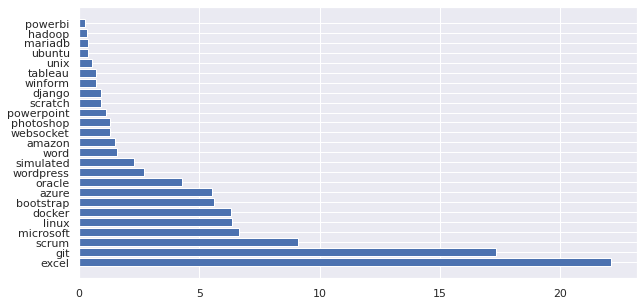

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.barh(idx, lis)
plt.show()

ValueError: ignored

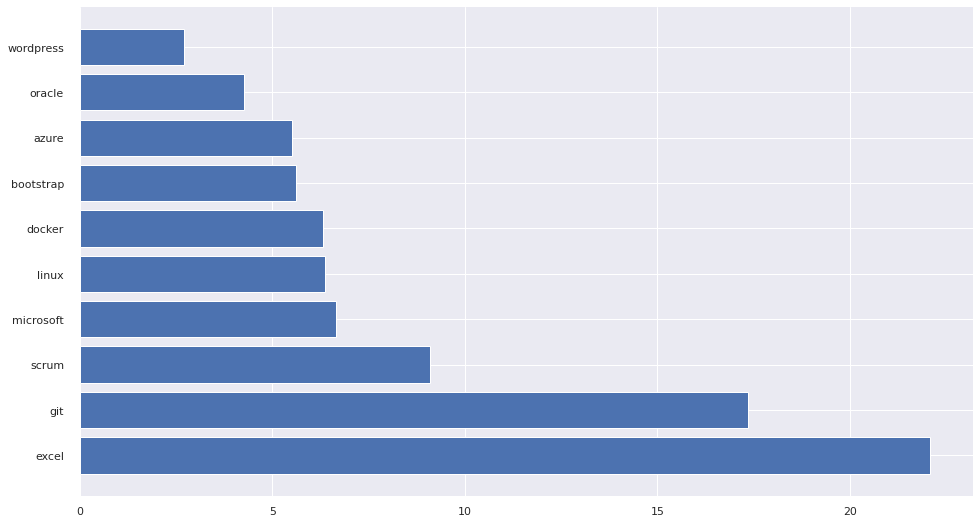

In [ ]:

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(idx[:10], lis[:10])
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Biểu đồ 2: các công cụ được phổ biến theo nhu cầu của các công ty \nở Viêt Nam tuyển dụng năm 2023',
             loc ='center' )
 
# Add Text watermark
fig.text(0.9, 0.15, 'tranhuuan', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
# Show Plot
plt.show()

## Top 10 tech using than most.

In [ ]:
job_tool['Name Tool'] = job_tool['Name Tool'].str.replace('^js$', 'javascript')

<ipython-input-73-5158f94e792e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  job_tool['Name Tool'] = job_tool['Name Tool'].str.replace('^js$', 'javascript')


In [ ]:
tech = ['c', 'nodejs', 'python', 'reactjs', 'angularjs', 'typescript', 'java', 'javascript', 'php', 'c++',
            'nestjs', 'scala', 'matlab', 'flutter']

In [ ]:
name = job_tool["Name Tool"].value_counts().index
values = job_tool["Name Tool"].value_counts().values
idx = []
val = []
for i, v in zip(name,values):
  if tech.__contains__(i):
    idx.append(i)
    val.append(v)
lis = []
for i in val:
  lis.append(i*100/sum(val))

In [ ]:
len(idx)

14

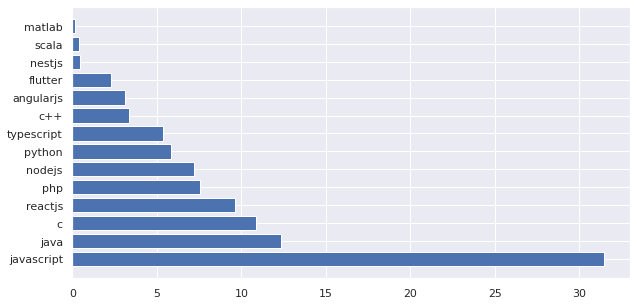

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.barh(idx, lis)
plt.show()

## Soft skill

In [ ]:
soft_skill = ['english', 'teamwork', 'research', 'communicated', 'manager', 'organization','mindset', 'creativity', 'adaptability', 'negotiation']

In [ ]:
name = job_skill["Name Skill"].value_counts().index
values = job_skill["Name Skill"].value_counts().values
idx = []
val = []
for i, v in zip(name,values):
  if soft_skill.__contains__(i):
    idx.append(i)
    val.append(v)
lis = []
for i in val:
  lis.append(i*100/sum(val))

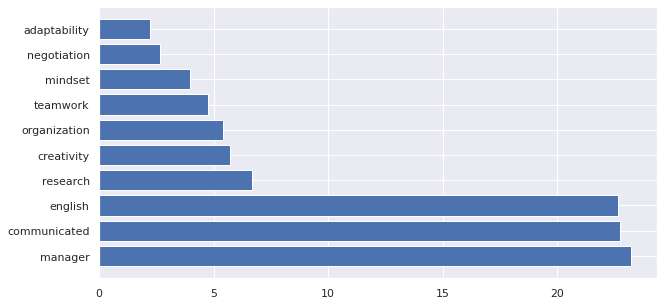

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.barh(idx, lis)
plt.show()

ValueError: ignored

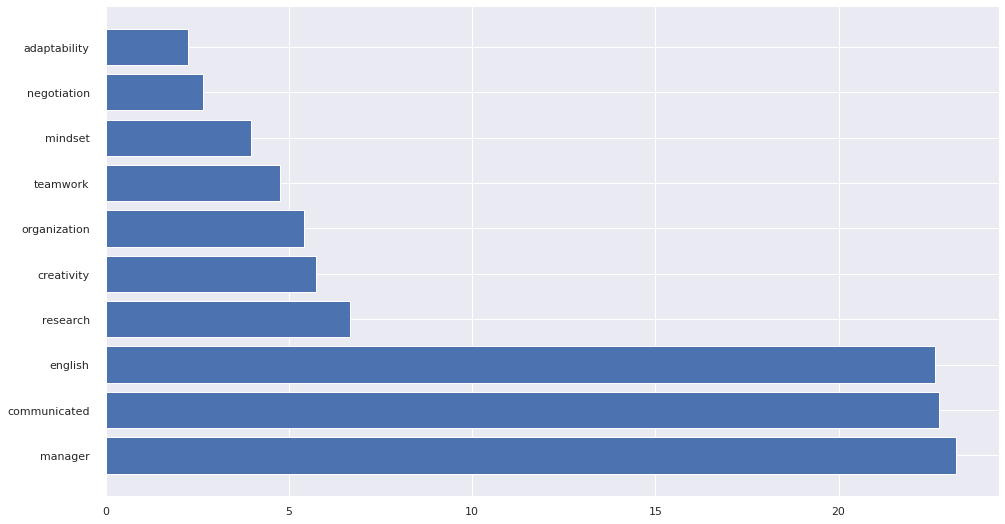

In [ ]:

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(idx[:13], lis[:13])
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Biểu đồ 1: các kĩ năng mềm được phổ biến theo nhu cầu của các công ty \nở Viêt Nam tuyển dụng năm 2023',
             loc ='center' )
 
# Add Text watermark
fig.text(0.9, 0.15, 'tranhuuan', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
# Show Plot
plt.show()

## Top 10 Technical skill

In [ ]:
technical_skill = [ 'sql', 'design', 'coding', 'analytic',
       'databases', 'test', 'network', 'virtualization']

In [ ]:

name = job_skill['Name Skill'].value_counts().index
values = job_skill['Name Skill'].value_counts().values
idx = []
val = []
for i, v in zip(name,values):
  if technical_skill.__contains__(i):
    idx.append(i)
    val.append(v)
lis = []
for i in val:
  lis.append(i*100/sum(val))

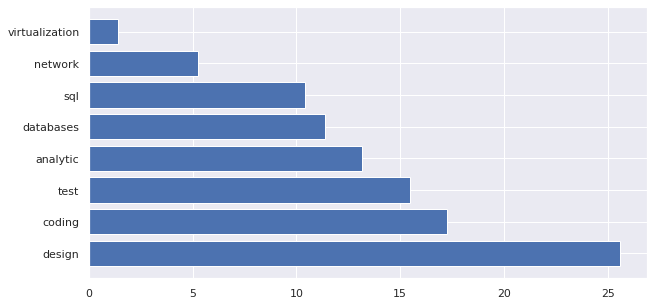

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.barh(idx, lis)
plt.show()

ValueError: ignored

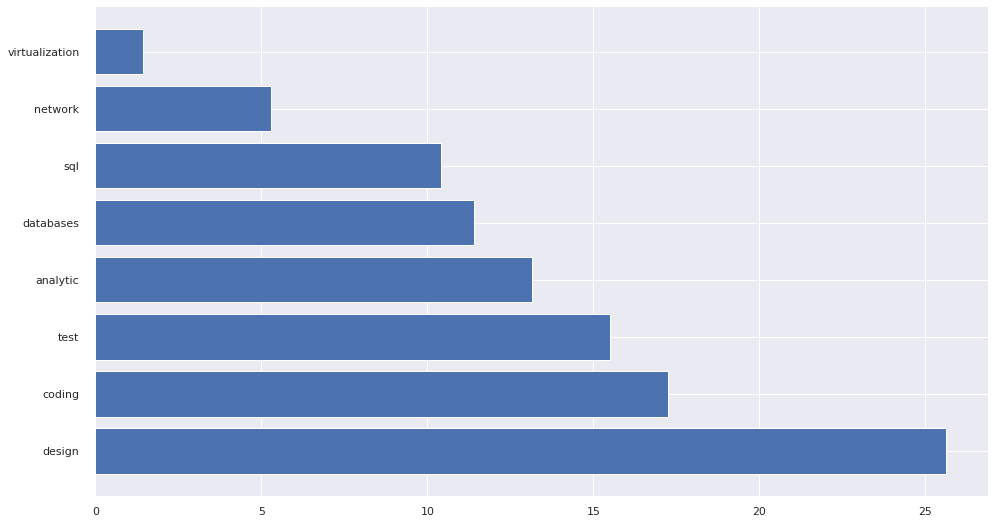

In [ ]:

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(idx[:13], lis[:13])
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Biểu đồ 1: Technical skill được phổ biến theo nhu cầu của các công ty \nở Viêt Nam tuyển dụng năm 2023',
             loc ='center' )
 
# Add Text watermark
fig.text(0.9, 0.15, 'tranhuuan', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
# Show Plot
plt.show()

## Percentage degree.

In [ ]:
vs_degree = job.merge(job_degree, how='left', left_on='index', right_on='index')


In [ ]:
vs_degree = vs_degree[['index', 'name degree']]

NameError: ignored

In [ ]:
vs_degree['y/n degree'] = vs_degree['name degree'].apply(lambda string: 'Yes' if str(string) != 'nan' else 'No', '')

NameError: ignored

In [ ]:
degreeX = vs_degree['y/n degree'].value_counts()
fig = plt.figure(figsize=(20,10))
plt.pie(degreeX.values, labels=degreeX.index, autopct='%1.1f%%',
       )
plt.show()

NameError: ignored

theo số liệu thống kê ở hình trên. Tỉ lệ mà bài tuyển dụng yêu cầu bằng cấp là 68.7%. Hỏi số liêu này có phù hợp với giả thuyết hay không hay nó sẽ lớn hơn 68.7%?<br>
- H0: p=0.687
- H1: p> 0.687<br>
 ta có tổng số là 5685 trong đó 3906 số lượng yêu cầu bằng cấp<br>
 

In [ ]:
vs_degree.loc[vs_degree['y/n degree'] == 'Yes', :].shape

NameError: ignored

In [ ]:
print('Tỉ lệ f: ', 3906/5685)

Tỉ lệ f:  0.6870712401055409


In [ ]:
((0.687-0.55)*math.sqrt(5685))/math.sqrt(1-0.687)

18.463483086019597

miền bác bỏ H0 sẽ nằm trong (-v  cùng, -1.96) hoặc (1.96, vô cùng)

kết luận: giả thuyết H0 bị bác bỏ.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
#perform one proportion z-test
proportions_ztest(count=0.687, nobs=5685, value=0.55)

Với z-statics = 0.0115 và p-value=0.99 => không đủ cơ sở để bác bỏ giả thuyết H0

## Location jobs.

In [ ]:
job['Location'].value_counts()

thành phố hồ chí minh    2733
hà nội                   1059
đà nẵng                   200
việt nam                  172
remote                     32
đắk lắk                    24
nha trang                  17
thừa thiên - huế           12
đồng nai                    9
gò vấp                      9
quận 7                      8
bình dương                  7
cần thơ                     5
bắc ninh                    4
khánh hòa                   4
hưng yên                    3
bình định                   3
thủ đức                     3
long an                     2
thuận an                    2
thủ dầu một                 1
long thành                  1
an giang                    1
hòa bình                    1
huế                         1
hạ long                     1
đà lạt                      1
quảng ngãi                  1
hải phòng                   1
hải dương                   1
Name: Location, dtype: int64

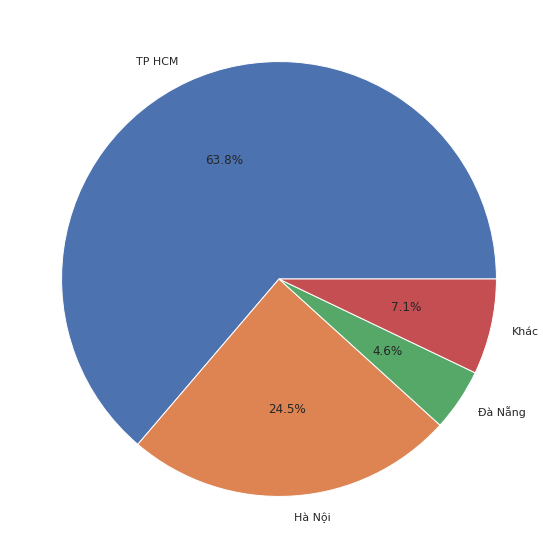

In [ ]:
explode = [63.76, 24.52, 4.63, 7.1]
labels = ['TP HCM', 'Hà Nội', 'Đà Nẵng', 'Khác']
fig = plt.figure(figsize=(10,10))
plt.pie(explode, labels=labels, autopct='%1.1f%%',
       )
plt.savefig('chart1_pieChart.png')

## Degree by level.

In [ ]:
# visualization data level by degree
data_vs_level = job.merge(job_level, how='left', left_on='index', right_on='index')
data_vs_level = data_vs_level.merge(job_YearExperience, how='left', left_on='index', right_on='index').rename(columns={0:'YearExperience'})
data_vs_level = data_vs_level.merge(job_degree, how='left', left_on='index', right_on='index').rename(columns={0:'degree'})

In [ ]:
data_vs_level

,index,JobTitle,Company,Location,Summary,JobUrl,name level,YearExperience,name degree
0,0,.Net Developer,SmartDev,đà nẵng,compani descript smartdev is a lead provid of ...,.NET Developer,manager,0.0,NaN
1,1,Intern / Fresher Developer,DXC Technology,thành phố hồ chí minh,overview : how would you like to join an inter...,.NET Developer,NaN,0.0,graduate
2,2,.NET Developer (Middle/Senior level),SIOUX,đà nẵng,sioux group wa found in 1996 in the netherland...,.NET Developer,NaN,4.0,bachelor
3,3,Jun/Mid/Senior .NET Developer,Saigon Technology,đà nẵng,"up to $ 2,200 junior , middl , senior da nang ...",.NET Developer,middle,2.0,master
4,3,Jun/Mid/Senior .NET Developer,Saigon Technology,đà nẵng,"up to $ 2,200 junior , middl , senior da nang ...",.NET Developer,middle,2.0,certificate
...,...,...,...,...,...,...,...,...,...
8077,4376,[HÀ NỘI] SENIOR/ MIDDLE RUBY ON RAILS,Việc Ơi It Client,hà nội,giới thiệu : việc ơi it client là công ty 100 ...,Full Stack Web Developer,leader,2.0,undergraduate
8078,4377,"Lập Trình Viên Fullstack (PHP, MYSQL, React) S...",JobsGO Recruit,thành phố hồ chí minh,mô tả công việc : ( mức lương : thỏa thuận ) d...,Full Stack Web Developer,senior,3.0,NaN
8079,4378,"Senior Fullstack Engineer (Java, React)",Zühlke,thành phố hồ chí minh,perman full-tim ho chi minh citi softwar engin...,Full Stack Web Developer,senior,5.0,certificate
8080,4378,"Senior Fullstack Engineer (Java, React)",Zühlke,thành phố hồ chí minh,perman full-tim ho chi minh citi softwar engin...,Full Stack Web Developer,senior,5.0,master


In [ ]:
data_vs_level['name level'].unique()

array(['manager', nan, 'middle', 'junior', 'senior', 'fresher', 'leader',
       'architect', 'intership'], dtype=object)

In [ ]:
indxs = data_vs_level.loc[data_vs_level['name level'].isna() == True, :].index
for indx in indxs:
    if data_vs_level['YearExperience'][indx] == 0:
        data_vs_level['name level'][indx] = 'intership/ fresher'
    elif data_vs_level['YearExperience'][indx] <= 3:
        data_vs_level['name level'][indx] = 'junior'
    else:
        data_vs_level['name level'][indx] = 'senior'

<ipython-input-97-f2cf66d51619>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vs_level['name level'][indx] = 'intership/ fresher'
<ipython-input-97-f2cf66d51619>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vs_level['name level'][indx] = 'senior'
<ipython-input-97-f2cf66d51619>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vs_level['name level'][indx] = 'junior'


In [ ]:
data_vs_level['name level'] = data_vs_level['name level'].str.replace('^fresher$|^intership$', 'intership/ fresher')

<ipython-input-98-a6f11d5e506e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_vs_level['name level'] = data_vs_level['name level'].str.replace('^fresher$|^intership$', 'intership/ fresher')


In [ ]:
data_vs_level['y/n degree'] = data_vs_level['name degree']
data_vs_level['y/n degree'] = data_vs_level['y/n degree'].apply(lambda string: 'Yes' if str(string) != 'nan' else 'No', '')

In [ ]:
data_chi = data_vs_level[['y/n degree', 'name level']]

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
contigency= pd.crosstab(data_chi['y/n degree'], data_chi['name level'])
contigency
c, p, dof, expected = chi2_contingency(contigency)
print (p)

5.933118976707722e-103


In [ ]:
data_v = data_vs_level[['y/n degree', 'name level']].groupby(['y/n degree', 'name level']).size().reset_index()

In [ ]:
data_v

,y/n degree,name level,0
0,No,architect,71
1,No,intership/ fresher,405
2,No,junior,527
3,No,leader,222
4,No,manager,698
5,No,middle,46
6,No,senior,369
7,Yes,architect,228
8,Yes,intership/ fresher,374
9,Yes,junior,791


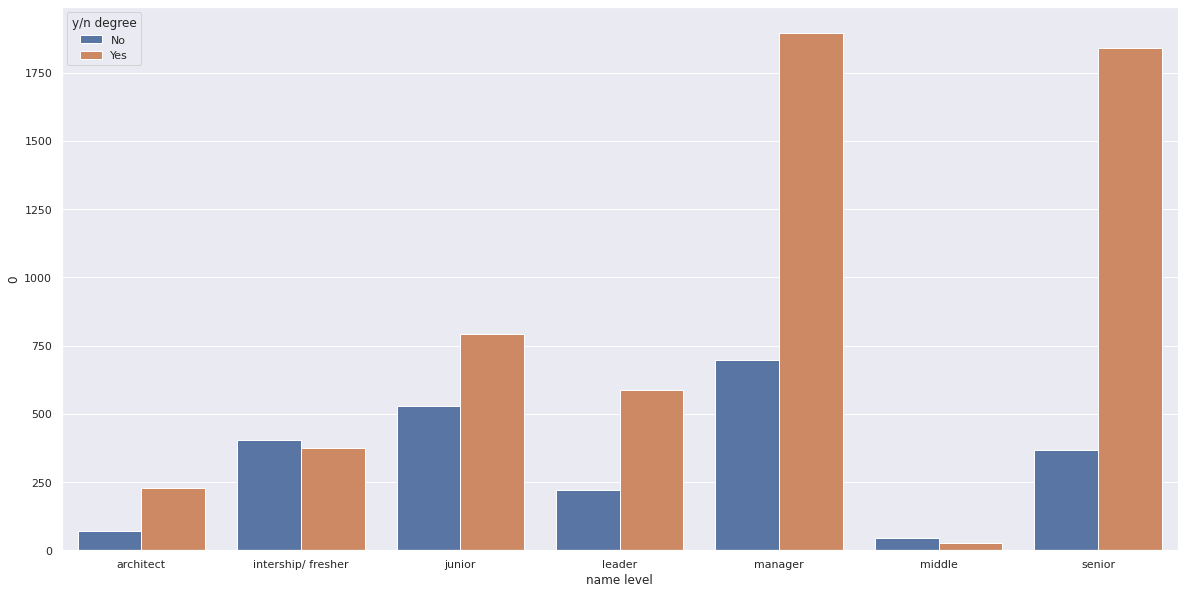

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.barplot(x = data_v['name level'], y = data_v[0], hue = data_v['y/n degree'])

plt.show()

## Language by level.

In [ ]:
job_level.head()

,index,name level
0,0,manager
1,3,middle
2,3,junior
3,3,senior
4,5,fresher


In [ ]:
job_tool.head()

In [ ]:
level_by_l =  ['middle', 'junior', 'senior', 'fresher', 'intership']
tech_by_level = ['javascript', 'java', 'php', 'python', 'c', 'c++']
print(tech_by_level)
print(level_by_l)

In [ ]:
mark_l = job_tool['Name Tool'].isin(tech_by_level)
job_l = job_tool[mark_l]

In [ ]:
mark_by_l = job_level['name level'].isin(level_by_l)
job_by_l = job_level[mark_by_l]

In [ ]:
job_by_l['name level'] = job_by_l['name level'].str.replace('^intership$', 'intenrship/fresher')
job_by_l['name level'] = job_by_l['name level'].str.replace('^fresher$', 'intenrship/fresher')

In [ ]:
job_l.head()

In [ ]:
data_analyst_level_by_language = job_by_l.merge(job_l, how = 'left', left_on='index', right_on='index')

In [ ]:
x = data_analyst_level_by_language.groupby([ 'Name Tool', 'name level'])['name level'].size()

In [ ]:
df3 = x.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

In [ ]:
x

In [ ]:
df3

In [ ]:
data_analyst_level_by_language.head()

In [ ]:
contigency= pd.crosstab(data_analyst_level_by_language['name level'], data_analyst_level_by_language['Name Tool'])
contigency
c, p, dof, expected = chi2_contingency(contigency)
print (p)

# Show DataSmaple

In [ ]:
job.head()

In [ ]:
job_skill.head()

In [ ]:
job_tool.head()

# Model recommend by statistical.

In [ ]:
import string

In [ ]:
def lables_title(string1):
  strings = string1
  strings = strings.lower()
  strings = strings.replace(strings[strings.find('('): strings.find(')')], '')
  strings = re.sub('senior|junior|fresher|intenr', '', strings)
  strings = strings.translate(str.maketrans('', '', string.punctuation))
  return strings

In [ ]:
job['JobTitle_to_fix'] = job['JobTitle'].apply(lambda strings: lables_title(strings))

In [ ]:
len(job.loc[job['JobTitle_to_fix'] == 'data analyst', :]['index'].unique())*100/job.shape[0]

0.2779064381658175

In [ ]:
idx = job.loc[job['JobTitle_to_fix'] == 'data analyst', 'index'].values

In [ ]:
idxs = job_skill['index'].isin(idx)

In [ ]:
job_skill.loc[job_skill['index'].isin(idx), :]['Name Skill'].unique()

array(['analytic', 'visualization', 'dashboard', 'manager', 'report',
       'support', 'statistics', 'knowledgeable', 'math', 'sql',
       'recommendations', 'leader', 'anomaly', 'databases', 'research',
       'provides', 'programing', 'communicated', 'segmentation', 'logic',
       'design', 'organization', 'english', 'optimization'], dtype=object)

In [ ]:
idx_tool = job.loc[job['JobTitle_to_fix'] == 'data analyst', 'index'].values

In [ ]:
idxs = job_tool['index'].isin(idx)

In [ ]:
job_tool.loc[job_tool['index'].isin(idx), :]['Name Tool'].unique()

array(['visual', 'sql', 'tableau', 'powerpoint', 'script', 'excel',
       'word', 'scala', 'python', 'snack', 'powerbi', 'serves'],
      dtype=object)

In [ ]:
def statistical(nameJob, user_skill, user_tool):
  idx = job.loc[job['JobTitle_to_fix'] == nameJob, 'index'].values
  

  idxs_skill = job_skill['index'].isin(idx)
  idxs_tool = job_tool['index'].isin(idx)

  unique_skill = job_skill.loc[job_skill['index'].isin(idx), :]['Name Skill'].unique()
  unique_tool = job_tool.loc[job_tool['index'].isin(idx), :]['Name Tool'].unique()
  print('Kỹ năng của '+ nameJob + ": ", str(unique_skill))
  print('Công cụ của '+ nameJob + ": ", str(unique_tool))


  per_user_skill = len(user_skill)*100/ len(unique_skill)
  requests_job_skill = 100 - per_user_skill

  per_user_tool = len(user_tool)*100/ len(unique_tool)
  requests_job_tool = 100 - per_user_tool
  # biểu đồ ứng viên có thể đáp ứng được công việc.
  plt.figure(figsize = (20,10))
  plt.subplot(1, 2, 1)
  explode = [per_user_tool, requests_job_tool]
  labels = ['công cụ ứng viên đáp ứng được', 'công cụ công việc yêu cầu']
  
  plt.pie(explode, labels=labels, autopct='%1.1f%%')
  plt.subplot(1, 2, 2)
  explode = [per_user_skill, requests_job_skill]
  labels = ['Kỹ năng ứng viên đáp ứng được', 'Kỹ năng công việc yêu cầu']
  
  plt.pie(explode, labels=labels, autopct='%1.1f%%')
  plt.show()

Kỹ năng của data analyst:  ['analytic' 'visualization' 'dashboard' 'manager' 'report' 'support'
 'statistics' 'knowledgeable' 'math' 'sql' 'recommendations' 'leader'
 'anomaly' 'databases' 'research' 'provides' 'programing' 'communicated'
 'segmentation' 'logic' 'design' 'organization' 'english' 'optimization']
Công cụ của data analyst:  ['visual' 'sql' 'tableau' 'powerpoint' 'script' 'excel' 'word' 'scala'
 'python' 'snack' 'powerbi' 'serves']


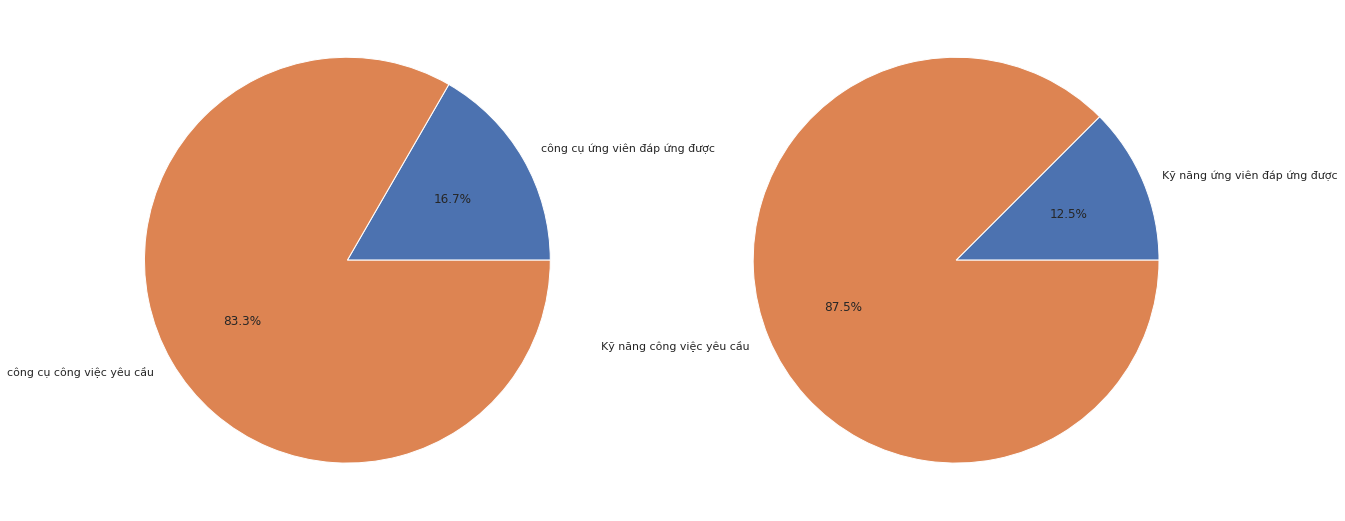

In [ ]:
statistical('data analyst', ['python', 'sql', 'spss'], ['design', 'test'])

# Show name job suitable with skills, tools of emplyment.

In [ ]:
st_job_tool = job_tool.loc[job_tool['Name Tool'].isin(['c', 'javascript']), :]['index'].unique()
st_job_skill = job_skill.loc[job_skill['Name Skill'].isin(['design', 'test', 'communicated']), :]['index'].unique()

In [ ]:
print(st_job_skill[:10])
print(st_job_tool[:10])


[ 0  1  2  3  5  7  8 10 11 14]
[ 0  2  3  4  5  6  7  8 10 11]


In [ ]:
values_job = job.loc[(job['index'].isin(st_job_skill)) & (job['index'].isin(st_job_tool)), :]['JobUrl'].value_counts()

In [ ]:
name = values_job.index
values = values_job.values
idx = []
val = []
for i, v in zip(name,values):
    idx.append(i)
    val.append(v*100/sum(values))

In [ ]:
sum(values)

344

In [ ]:
def show_job_suitable(user_skill, user_tool):
  # get index  the tools and skills of the user.
  st_job_tool = job_tool.loc[job_tool['Name Tool'].isin(user_tool), :]['index'].unique()
  st_job_skill = job_skill.loc[job_skill['Name Skill'].isin(user_skill), :]['index'].unique()
  # get the job by the tools of user and skills of the user.
  values_job = job.loc[(job['index'].isin(st_job_skill)) & (job['index'].isin(st_job_tool)), :]['JobUrl'].value_counts()
  # calulator percentage.
  name = values_job.index
  values = values_job.values
  idx = []
  val = []
  for i, v in zip(name,values):
      idx.append(i)
      val.append(v*100/sum(values))
  # show barchart
  fig = plt.figure(figsize=(15,6))
  plt.barh(idx, val)
  plt.show()

In [ ]:
show_job_suitable(['design', 'test']['c', 'javascript'])

<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<ipython-input-125-f9e0e11acc8f>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  show_job_suitable(['design', 'test']['c', 'javascript'])


TypeError: ignored

# kiểm định trung bình mỗi bài tuyển dụng có 6 kỹ năng và 4 công nghệ sử dụng.

In [ ]:
# data_skill = job_skill.groupby(['index'])['Name Skill'].size().values

In [ ]:
# plt.hist(data_skill)

In [ ]:
# from scipy import stats

In [ ]:
# stats.ttest_1samp(data_skill, 6)

với mức ý nghĩa 5%, chấp nhận giả thuyết: giá trị trung bình của tổng thể chung 
bằng 6


In [ ]:
# job_tool

In [ ]:
# data_tool = job_tool.groupby(['index'])['Name Tool'].size().values

In [ ]:
# data_tool.desribes()

In [ ]:
# job_tool.loc[job_tool['index'] ==4375, :]

In [ ]:
# plt.hist(data_tool)

In [ ]:
# stats.ttest_1samp(data_tool, 4)

# Model recommend by statistical

In [ ]:
job

,index,JobTitle,Company,Location,Summary,JobUrl,JobTitle_to_fix
0,0,.Net Developer,SmartDev,đà nẵng,compani descript smartdev is a lead provid of ...,.NET Developer,net developer
13,1,Intern / Fresher Developer,DXC Technology,thành phố hồ chí minh,overview : how would you like to join an inter...,.NET Developer,intern developer
27,2,.NET Developer (Middle/Senior level),SIOUX,đà nẵng,sioux group wa found in 1996 in the netherland...,.NET Developer,net developer
56,3,Jun/Mid/Senior .NET Developer,Saigon Technology,đà nẵng,"up to $ 2,200 junior , middl , senior da nang ...",.NET Developer,junmid net developer
75,4,"Web Developer (.NET, ASP.NET, C#)",NPV Corp,đà nẵng,"web develop ( .net , asp.net , c # ) npv corp ...",.NET Developer,web developer
...,...,...,...,...,...,...,...
84480,4374,[HCM] Lập Trình Viên Fullstack Senior/Junior (...,JobsGO Recruit,thành phố hồ chí minh,mô tả công việc : ( mức lương : 15 - 45 triệu ...,Full Stack Web Developer,hcm lập trình viên fullstack lương từ 15 4...
84502,4375,[Cầu Giấy/HN] React Native Developerusd,Việc Ơi Client,hà nội,giới thiệu : ... job descript : we are strive ...,Full Stack Web Developer,cầu giấyhn react native developerusd
84507,4376,[HÀ NỘI] SENIOR/ MIDDLE RUBY ON RAILS,Việc Ơi It Client,hà nội,giới thiệu : việc ơi it client là công ty 100 ...,Full Stack Web Developer,hà nội middle ruby on rails
84525,4377,"Lập Trình Viên Fullstack (PHP, MYSQL, React) S...",JobsGO Recruit,thành phố hồ chí minh,mô tả công việc : ( mức lương : thỏa thuận ) d...,Full Stack Web Developer,lập trình viên fullstack được cấp macbook 1...


In [ ]:
job_skill

,index,Name Skill
0,0,provides
1,0,cleaning
2,0,coding
3,0,design
4,0,manager
...,...,...
7986,4146,report
7987,4146,support
7988,4159,english
7989,4159,communicated


In [ ]:
job_tool

,index,Name Tool
0,0,excel
1,0,sql
2,0,c
3,0,visual
4,0,nodejs
...,...,...
17531,4377,git
17532,4378,scrum
17533,4378,docker
17534,4378,java


Input: name skills and tech of staff. True syntax<br>
example: experience staff = '''Data Cleaning & Exploration using Python, Data Modifying & Visualization using Microsoft Excel, Data Modifying & Visualization using Microsoft Excel
        Database Administrating using SQL Server'''

In [ ]:
skill = ['cleaning', 'visualization', 'modifying']
tool = ['python', 'excel', 'sql']

In [ ]:
staff_skill = job_skill.loc[job_skill['Name Skill'].isin(skill), :]

In [ ]:
staff_skill

,index,Name Skill
1,0,cleaning
10,0,visualization
21,2,cleaning
99,18,cleaning
110,20,visualization
...,...,...
7899,4004,cleaning
7921,4063,cleaning
7930,4069,cleaning
7947,4092,cleaning


In [ ]:
staff_tool = job_tool.loc[job_tool['Name Tool'].isin(tool), :]

In [ ]:
staff_tool['Name Tool'].unique()

array(['excel', 'sql', 'python'], dtype=object)

In [ ]:
quanlity = list(staff_skill['index'].unique()) + list(staff_tool['index'].unique())

In [ ]:
quanlity  = list(dict.fromkeys(quanlity))

In [ ]:
job.loc[job['index'].isin(staff_skill['index'].unique()), :]['JobUrl'].value_counts()

Business Analyst           55
.NET Developer             45
Back End Developer         16
Android Developer          15
Front End Developer        11
Android App Developer      10
Full Stack Developer       10
C++ Developer               8
Embedded Engineer           3
Bridge Engineer             1
Front End Web Developer     1
Name: JobUrl, dtype: int64

In [ ]:
job.loc[job['index'].isin(staff_tool['index'].unique()), :]['JobUrl'].value_counts()

Business Analyst            420
.NET Developer              362
Front End Developer         226
Full Stack Developer        172
Back End Developer          152
Front End Web Developer     150
Full Stack Web Developer    111
Back End Web Developer      106
Android Developer           101
C++ Developer                96
Embedded Engineer            73
Android App Developer        30
Bridge Engineer              30
Name: JobUrl, dtype: int64

In [ ]:
job.loc[job['index'].isin(quanlity), :]['JobUrl'].value_counts()

Business Analyst            431
.NET Developer              372
Front End Developer         231
Full Stack Developer        179
Back End Developer          158
Front End Web Developer     151
Full Stack Web Developer    111
Android Developer           109
Back End Web Developer      106
C++ Developer               102
Embedded Engineer            76
Android App Developer        37
Bridge Engineer              31
Name: JobUrl, dtype: int64

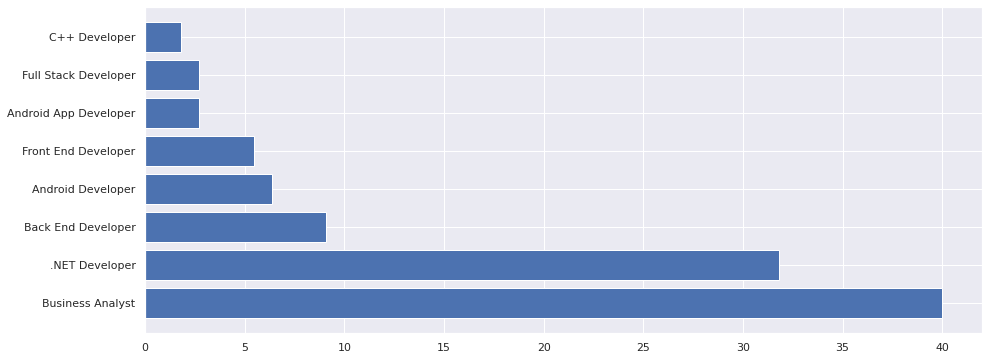

In [ ]:
show_job_suitable(skill, tool)

# Test 10 CV

In [ ]:
dataCV = [ '''Data Cleaning & Exploration using Python, Data Modifying & Visualization using Microsoft Excel, 
              Data Modifying & Visualization using Microsoft Excel
              Database Administrating using SQL Server''',
        '''using Reactjs and javascript, use to git, teamwork, design''',
        '''Using R, SQL, visualization data''',
        '''Rapidly prototyping and implementing scalable, reliable, and maintainable websites and applications via JavaScript, 
            TypeScript, and other web development technologies.
            Researching new technologies to apply in business projects..
            Building sustainable coding that may be used in the future
            Work with our development team to design, develop, and test web applications using JavaScript, HTML, and CSS. 
            Support the internal team to debug and troubleshoot issues that arise during the development process. 
            Participate in code reviews and contribute to the development of best practices for JavaScript development.''', 
          '''English fluency is a must
            Fresh graduate or moderately experienced 1 year of experience in Data Analysis or Data Engineering
            Fundamental programming skills in one or more languages such as Python or SQL
            Familiarity with databases such as MySQL, PostgreSQL or Cassandra
            Experience with data analysis and data visualization tools such as Quicksight or Grafana
            Understanding of data modeling concepts and ETL processes
            Strong analytical and problem-solving skills
            Excellent communication and teamwork skills
            Must be able to show initiative to get a job done with little / no supervision
            Domain knowledge on digital marketing is a plus
            AWS experience is a plus''']

In [ ]:
def result(string):
  strig = string.lower()
  strig = re.sub(r'[\W_]+', ' ', strig)
  arr = strig.split()
  skill = []
  tool = []
  for i in arr:
    if skill_keywords.__contains__(i):
      skill.append(i)
    if tool_keywords.__contains__(i):
      tool.append(i)
  print(skill)
  print(tool)
  show_job_suitable(skill, tool)

['english', 'sql', 'databases', 'visualization', 'etl', 'teamwork', 'marketing']
['python', 'sql']


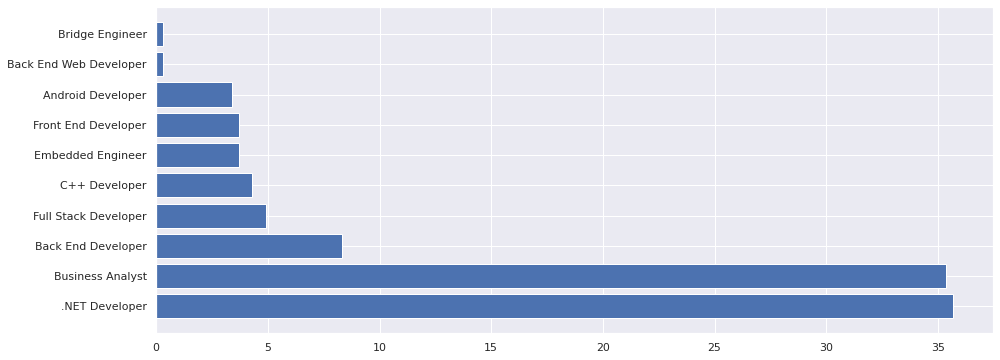

In [ ]:
result(dataCV[4])

# Model

In [ ]:
result(dataCV[2])

In [ ]:
for i in dataCV:
  result(i)

In [ ]:
data = job.merge(job_skill, left_on='index', right_on='index', how='left')

In [ ]:
data = data.merge(job_tool, left_on='index', right_on='index', how='left')

In [ ]:
train = data[['Name Skill', 'Name Tool', 'JobUrl']]

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#create instance of label encoder
lab = LabelEncoder()

In [ ]:
#perform label encoding on 'team' column
train['NameJob_label'] = lab.fit_transform(train['JobUrl'])

In [ ]:
#perform label encoding on 'team' column
train['Name_skill_label'] = lab.fit_transform(train['Name Skill'])
#perform label encoding on 'team' column
train['Name_tool_label'] = lab.fit_transform(train['Name Tool'])

In [ ]:
train

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
train1 =  train[['NameJob_label', 'Name_skill_label', 'Name_tool_label']]

In [ ]:
X = train1.drop('NameJob_label', axis = 1)
y = train1['NameJob_label']

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape )

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
ln = model.fit(X_train, y_train)

In [ ]:
ln.score(X_test, y_test)

In [ ]:
ln.coef_

# logistics regesion

In [ ]:

from sklearn.linear_model import LogisticRegression

In [ ]:
modelLg = LogisticRegression()

modelLg.fit(X_train,y_train)

predLg = modelLg.predict(X_test)

In [ ]:

# Model Accuracy, how often is the classifier correct?
lg =metrics.accuracy_score(y_test, predLg)
print("Accuracy:", lg)
     

# Show data

In [ ]:
job.head()

,index,JobTitle,Company,Location,Summary,JobUrl,JobTitle_to_fix
0,0,.Net Developer,SmartDev,đà nẵng,compani descript smartdev is a lead provid of ...,.NET Developer,net developer
13,1,Intern / Fresher Developer,DXC Technology,thành phố hồ chí minh,overview : how would you like to join an inter...,.NET Developer,intern developer
27,2,.NET Developer (Middle/Senior level),SIOUX,đà nẵng,sioux group wa found in 1996 in the netherland...,.NET Developer,net developer
56,3,Jun/Mid/Senior .NET Developer,Saigon Technology,đà nẵng,"up to $ 2,200 junior , middl , senior da nang ...",.NET Developer,junmid net developer
75,4,"Web Developer (.NET, ASP.NET, C#)",NPV Corp,đà nẵng,"web develop ( .net , asp.net , c # ) npv corp ...",.NET Developer,web developer


In [ ]:
job_skill.head()

,index,Name Skill
0,0,provides
1,0,cleaning
2,0,coding
3,0,design
4,0,manager


In [ ]:
job_tool.head()

,index,Name Tool
0,0,excel
1,0,sql
2,0,c
3,0,visual
4,0,nodejs


In [ ]:
job_level.head()

,index,name level
0,0,manager
1,3,middle
2,3,junior
3,3,senior
4,5,fresher


In [ ]:
job_degree.head()

,index,name degree
0,1,graduate
1,2,bachelor
2,3,master
3,3,certificate
4,4,undergraduate


In [ ]:
data123 = job.merge(job_skill, left_on='index', right_on='index', how='left')

In [ ]:
data123 = data123.merge(job_tool, left_on='index', right_on='index', how='left')

data123 = data123.merge(job_degree, left_on='index', right_on='index', how='left')

In [ ]:
data123.head()

,index,JobTitle,Company,Location,Summary,JobUrl,JobTitle_to_fix,Name Skill,Name Tool,name degree
0,0,.Net Developer,SmartDev,đà nẵng,compani descript smartdev is a lead provid of ...,.NET Developer,net developer,provides,excel,NaN
1,0,.Net Developer,SmartDev,đà nẵng,compani descript smartdev is a lead provid of ...,.NET Developer,net developer,provides,sql,NaN
2,0,.Net Developer,SmartDev,đà nẵng,compani descript smartdev is a lead provid of ...,.NET Developer,net developer,provides,c,NaN
3,0,.Net Developer,SmartDev,đà nẵng,compani descript smartdev is a lead provid of ...,.NET Developer,net developer,provides,visual,NaN
4,0,.Net Developer,SmartDev,đà nẵng,compani descript smartdev is a lead provid of ...,.NET Developer,net developer,provides,nodejs,NaN


In [ ]:
data123[['JobTitle', 'Company', 'Location', 'Name Skill', 'Name Tool', 'name degree', 'JobUrl']].sample(n=50).sample(n=10).rename(columns={'JobUrl': 'JobName'})

,JobTitle,Company,Location,Name Skill,Name Tool,name degree,JobName
48118,HCMC - .NET Developer (Middle/Senior),amaris,thành phố hồ chí minh,NaN,microsoft,it,Full Stack Developer
36534,"Senior Java Developer (Oracle, OOP)",Fortna Vietnam,thành phố hồ chí minh,programing,java,bachelor,C++ Developer
6387,Junior/Exp. Java developer (EDI tech),Ekino Vietnam,thành phố hồ chí minh,support,java,graduate,.NET Developer
43688,EET_Front End Developer (ReactJS),Bosch Group,thành phố hồ chí minh,NaN,simulated,it,Front End Developer
43310,Senior Java Developer,Công ty TNHH Bảo hiểm Hanwha Life Việt Nam,thành phố hồ chí minh,test,sql,undergraduate,Front End Developer
33075,Software Engineer for Big Data,METRO.digital,thành phố hồ chí minh,cleaning,scala,bachelor,Business Analyst
28693,Data Scientist (40000031),Techcombank,thành phố hồ chí minh,statistics,scrum,master,Business Analyst
36726,Principal Technical Architect,NTT Ltd.,hà nội,design,oracle,it,C++ Developer
47694,project manager,xspera,thành phố hồ chí minh,warehouse,scrum,certificate,Full Stack Developer
5148,Fullstack Developer (.NET/ReactJS/ NodeJS)~Up ...,Away Digital Teams,thành phố hồ chí minh,NaN,azure,NaN,.NET Developer
